# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). <br/>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br/>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Описание столбцов

<b>Name</b> — название игры

<b>Platform</b> — платформа

<b>Year_of_Release</b> — год выпуска

<b>Genre</b> — жанр игры

<b>NA_sales</b> — продажи в Северной Америке (миллионы долларов)

<b>EU_sales</b> — продажи в Европе (миллионы долларов)

<b>JP_sales</b> — продажи в Японии (миллионы долларов)

<b>Other_sales</b> — продажи в других странах (миллионы долларов)

<b>Critic_Score</b> — оценка критиков (от 0 до 100)

<b>User_Score</b> — оценка пользователей (от 0 до 10)

<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Цель
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Знакомство с данными

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import levene
from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм состоит из 16715 строк, и 11 столбцов. <br/>
Мы видим, что только 5 из 11 столбцов имеют все данный, в остальных столбцах есть пропуски. 
Больше всего пропусков в столбах "Оценка критиков" и "Оценка пользователей", а также "Возрастной категории".
Такое большое количество пропусков может объясняться тем, что рейтинги ведут недавно. Также, возможно, непопулярные игры вообще не оценивались.

Проверим данные на дубликаты.

In [ ]:
df.duplicated().sum()

0

Приведем название столбцов к нижнему регистру.

In [ ]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Выводы:
- Очень много пропусков и проблемы с типами данных. Поработаем над этим дальше. 
- В датафрейме нет дубликатов.
- Привели все названия столбцов к нижнему регистру.
- Для дальнейшего анализа не хватает итоговой суммы продаж, добавим этот столец позже.

# Предобработка данных

Проверяем данные на количество пропусков.

In [ ]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заполним те пропуски, которые сможем заполнить.

<b>Столбцы name и genre

In [ ]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В name и genre всего по два пропуска и они находятся в одних и тех же строчках. Данные строки не информативны, поэтому удалим их.

In [ ]:
df = df.dropna(subset=['name']).reset_index(drop=True)
df['name'].isna().sum()

0

<b>Столбец year_of_release

In [ ]:
df['year_of_release'].isna().sum()

269

In [ ]:
df.sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14981,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1078,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3861,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13793,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
15610,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E
8279,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


Некоторые игры выходили в один год сразу на разных платформах. Используем это для заполнения пропусков.

In [ ]:
df.year_of_release = df.groupby('name')['year_of_release'].transform(lambda x:  x.fillna(scipy.stats.mode(x).mode[0]))
df['year_of_release'].isna().sum()

173

Удалось заменить почти 100 пропущенных значения. Остальные значения заполнить нельзя, поэтому удалим их.

In [ ]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)
df['year_of_release'].isna().sum()

0

Переводим столбец в формат int

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['year_of_release'].dtype

dtype('int64')

<b>Столбцы critic_score и user_score

In [ ]:
df['critic_score'].isna().sum()

8485

In [ ]:
df['user_score'].isna().sum()

6627

Пропусков в столбцах очень много и заполнить их не представляется возможным, как и удалить, потому что в этих строках нужные для анализа данные

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание на аббревиатуру tbd в столбце user_score. Аббревиатура tbd значит to be done. Игру еще не оценили. Т.к. мы не можем получить эти оценки, то заменим tbd на Nan.

In [ ]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)

df['user_score'] = df['user_score'].astype(float)
df['user_score'].dtype

dtype('float64')

<b>Столбец rating

Как и в предыдущих столбцах, заполнить данные значениями мы не можем. Заполним пропуски "unknown".

In [ ]:
df['rating'] = df['rating'].fillna('unknown')

<b>Столбец total_sales

Создадим столбец с суммарными значениями продаж по всем регионам.

In [ ]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## Выводы:
- Некоторые пропущенные значения в столбце года выпуска игры удалось заполнить. Остальные пропуски заполнить невозможно, будем работать с данными в таком виде.
- Перевели данные в стобцах "year_of_release", "critic_score", "user_score" в нужный формат для экономии памяти и проведения расчетов.
- Для будущего анализа добавили стобец с сумарными значениями по всем регионам.

# Исследовательский анализ

Посмотрим сколько игр выпускалось в разные года.

In [ ]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     122
1995     219
1996     263
1997     289
1998     379
1999     339
2000     351
2001     486
2002     843
2003     783
2004     764
2005     945
2006    1019
2007    1202
2008    1439
2009    1430
2010    1265
2011    1145
2012     655
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

Для удобства проиллюстрируем информацию на графике.

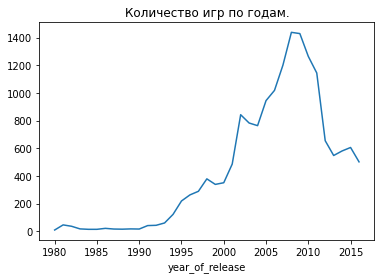

In [ ]:
df.groupby('year_of_release')['name'].count().plot()
plt.title('Количество игр по годам.');

Предсказуемо, что с 1980 года был постоянный рост количества новых игры, выходящих каждый год. Видим что произошел скачок в разработке игр после 1994 года, так продолжалось до 2009 года, после чего пошел спад и резкое падение в разработке в 2012 году. Как вариант это можно объяснить тем, что в данных отражены только продажи физических копий игр, а цифровые копии не учтены. Возможно, с 2012 года начинается рост продажи цифровых копий.

Посмотрим распределение продаж по платформам.

In [ ]:
top_platform = (df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False))
top_platform

,total_sales
platform,
PS2,1247.16
X360,964.13
PS3,932.73
Wii,902.00
DS,803.18
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.30


Из таблицы видно, что самые большие продажи были у платформа PS2, X360, PS3, Wii, DS, PS.
Посмотрим распределение продаж по этим платформам по годам.

In [ ]:
top_10_platform_years = df.query('platform in @top_platform.head(10).index')
top_10_platform_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [ ]:
(top_10_platform_years
                  .pivot_table(index=['platform', 'year_of_release'], 
                               values='total_sales', aggfunc='count'))

total_sales
platform year_of_release             
DS       1985                       1
         2004                      23
         2005                     118
         2006                     201
         2007                     377
...                               ...
X360     2012                     107
         2013                      75
         2014                      63
         2015                      35
         2016                      13

[117 rows x 1 columns]

Построим гистограммы распределения продаж по годам для каждой платформы.

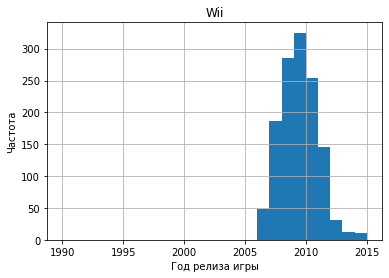

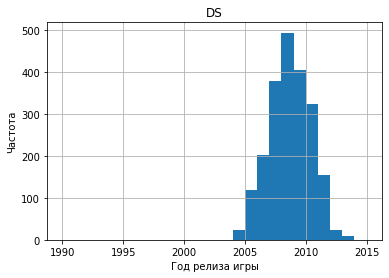

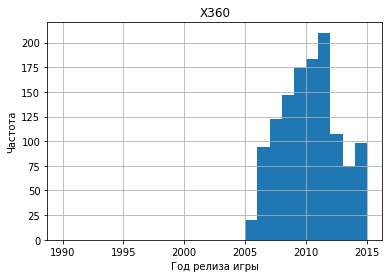

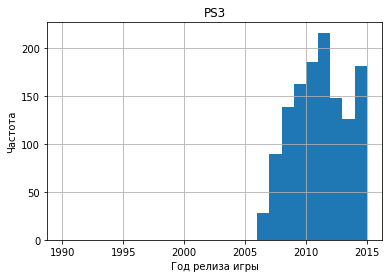

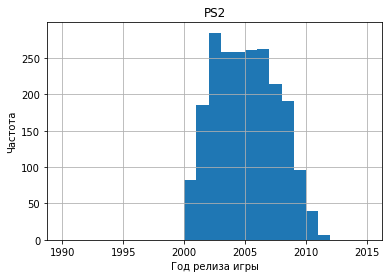

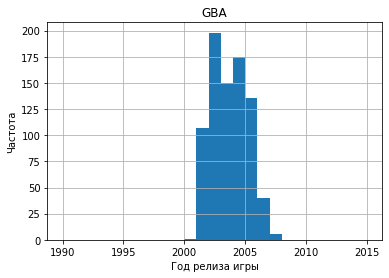

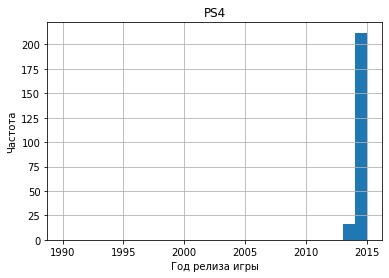

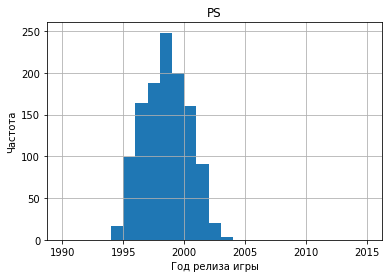

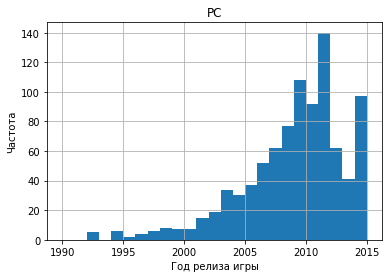

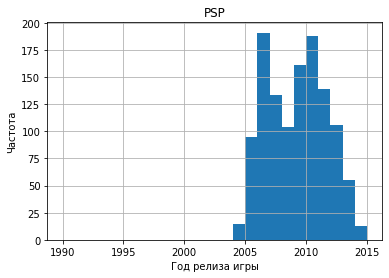

In [ ]:
years_list = []
for i in range(1990, 2016):
    years_list.append(i)

platform_list = top_10_platform_years['platform'].unique()

for j in range(0, len(platform_list)):
    top_10_platform_years[top_10_platform_years['platform']==platform_list[j]]\
    .plot(kind='hist', bins=years_list, legend=False, grid=True)
    
    plt.title(platform_list[j])
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

Как мы видно из графиков распределение суммарных продаж по каждой платформе по годам стремится к нормальному. Т.е. при появлении новой платформы продажи сначала небольшие, потому они растут и достигают пика в середине срока жизни платформы, а далее начинается падени продаж и платформа перестает существовать.

По графикам видно, что средняя продолжительность жизни каждой платформы составляет примерно 10 лет, выбивается только платформа PC. На протяжении 10 лет идет ее активный рост. 

Пропробуем расчитать продолжительность жизни платформ

In [ ]:
top_10_platform_years.groupby('platform')['year_of_release'].nunique()

platform
DS      11
GBA      8
PC      26
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
Wii     11
X360    12
Name: year_of_release, dtype: int64

Получается, что время жизни платформы в среднем больше 10 лет, PS3 и X360 - еще на стадии угасания, поэтому они могу просуществовать еще несколько лет,  PS4 только начала свою жизнь и находится на стадии активного роста.

## Потенциально прибыльные платформы

Для дальнейшего анализа выберем данные за последние несколько лет, т.к. они отражают последние тенденции и на их основании можно делать различные предположения на будущее.

Актуальным периодом будем считать 2012 - 2015 года.

Сделаем срез данных по этому периоду.

In [ ]:
df_relevant = df.query('2011 < year_of_release < 2016')
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16499,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16503,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16507,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16517,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Посмотрим какие платформы лидируют по суммарным продажам в этом периоде времени:

In [ ]:
rel_platform_sales_sum = (df_relevant
                          .pivot_table(index='platform', values='total_sales', aggfunc=sum)
                          .sort_values(by='total_sales', ascending=False)
                         )
rel_platform_sales_sum

,total_sales
platform,
PS3,285.19
PS4,244.89
X360,235.03
3DS,179.47
XOne,133.17
WiiU,77.59
PC,58.04
PSV,44.93
Wii,35.19


Первые 5 платформ лидируют по продажам - это PS4, PS3, X360, 3DS, XOne.
Будем считать их потенциально прибыльными платформами. 

Посмотрим распределение продаж по всем платформам по годам за период 2012-2015. 

In [ ]:
rel_platform_sales_sum = (df_relevant
                          .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=sum)
                         )
rel_platform_sales_sum

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.23
         2013                   13.01
         2014                   13.28
         2015                    8.52
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
PSP      2012                    7.69
         2013                    3.38
         2014                    0.24
         2015                    0.12
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
X360     2012                   99.75
         2013                   88.58
         2014                   34.74
         2015                   11.96
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14

По 3 годам сложно определить реальную картину, но у нас получается, что только платформы PS4 и XOne показывают рост в период 2012-2015, у остальных платформ спад в продажах год к году. 

## Диаграмма размаха по глобальным продажам игр в разбивке по платформам.

Построим график распределения продаж игр по платформам.

(0.0, 2.5)

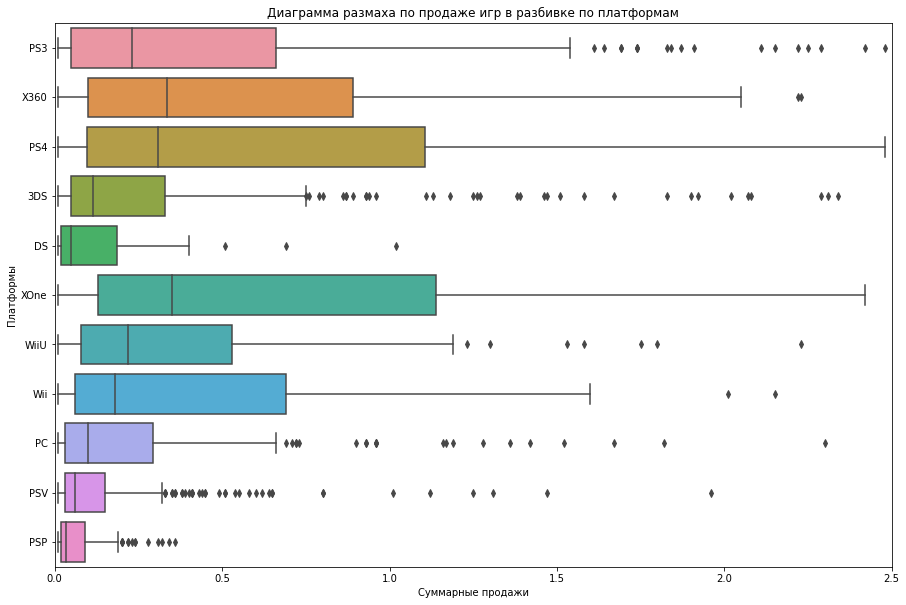

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_relevant, x='total_sales', y='platform')

plt.title(label='Диаграмма размаха по продаже игр в разбивке по платформам')
plt.xlabel("Суммарные продажи")
plt.ylabel("Платформы")
plt.xlim(0, 2.5)

- Проанализировав графики, мы видим общую тенденцию для всех платформ. Во-первых, линия медианы находится не в центре ящика. Это означает, что данные расспределены ассиметрично. Во-вторых, медиана сдвинута ближе к первому квартилю. Это означает, что большая часть игр во всех платформах имеет низкие продажи. 

- У платформ DS, PSP, PSV, PC, 3DS небольшие ящики, это значит что диапазон значения продаж по играм маленький, т.е. 75% игр на этих платформах приносят примерно одинаковую и незначительную прибыль. У PSV, PC, 3DS есть игры которые принесли продаж больше, чем 75% других игр. 
- У остальных платформ очень широкая вариативность суммарных продаж от игры. Особенно выделяются платформы XOne и PS4, широкий диапазон boxplot говорит о том, что нет однородного распределения выручки по этим платформам. А длинные усы по некоторым платформам говорит нам о том, что есть высокий  расброс среднеквадратичного отклонения в сторону больших продаж. Т.е. достаточно большое количество игр на этих платформах были крайне популярными.

## Влияние отзывов пользователей и критиков на продажи внутри платформ.

Влияние отзывов на продажи рассмотрим на примере 5 популярных игровых платформах: PS4, PS3, X360, 3DS, XOne.<br/>
Для большей наглядности отобразим зависимость продаж от оценок на диаграмме размаха.

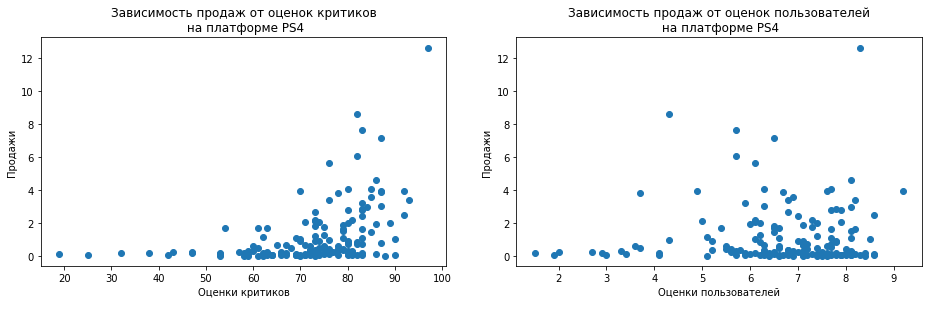

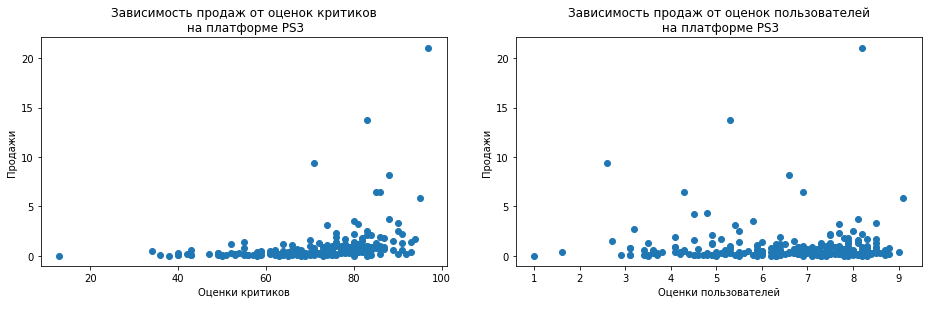

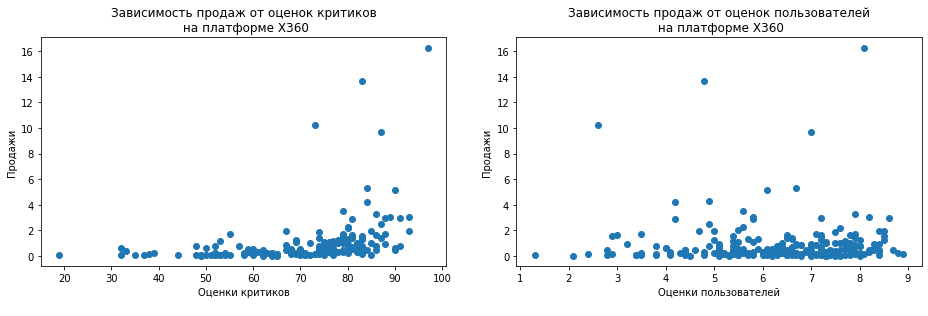

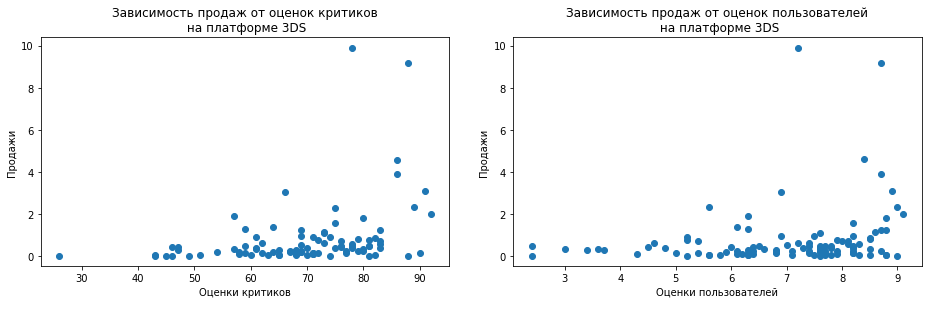

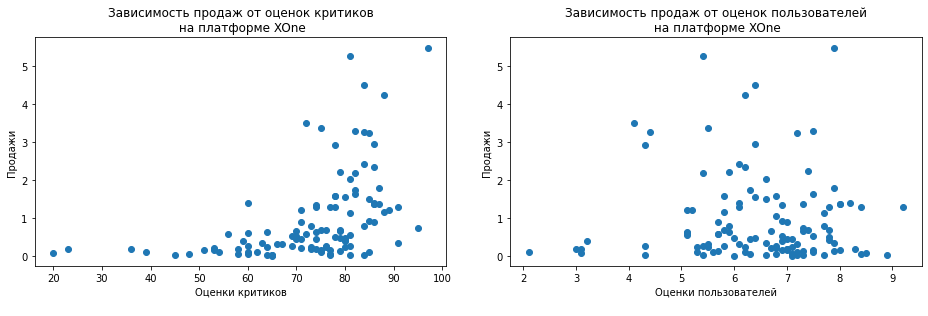

In [ ]:
popular_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']

for name_platform in popular_platforms:
    x_critic = df_relevant[df_relevant['platform']==name_platform]['critic_score']
    y_critic = df_relevant[df_relevant['platform']==name_platform]['total_sales']
    
    x_user = df_relevant[df_relevant['platform']==name_platform]['user_score']
    y_user = df_relevant[df_relevant['platform']==name_platform]['total_sales']
    
    
    fig = plt.figure(figsize=(13, 4.5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform)
    ax1.set_xlabel('Оценки критиков\n')
    ax1.set_ylabel('Продажи')
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform)
    ax2.set_xlabel('Оценки пользователей\n')
    ax2.set_ylabel('Продажи')
    
    plt.tight_layout(w_pad=3)

Проанализировав, графики рассеивания, можно отметить, что объем продаж игр возрастает при оценке критиков 55 и выше, и при оценке пользователей от 5 и выше. Яркой зависимости продаж от оценки нет.

Расчитаем коэффициент корреляции для влияния оценки игры на ее продажи. 

In [ ]:
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print()
print()
for name_platform in popular_platforms:
    print(name_platform)
    print()
    print('{: <30.2}{: <30.2}'.format(df_relevant[df_relevant['platform']==name_platform]['total_sales']\
        .corr(df_relevant[df_relevant['platform']==name_platform]['critic_score'])\
                                   
        , df_relevant[df_relevant['platform']==name_platform]['total_sales']\
        .corr(df_relevant[df_relevant['platform']==name_platform]['user_score'])))
    print()

продажи и оценки критиков     |продажи и оценки пользователей


PS4

0.43                          0.024                         

PS3

0.33                          -0.022                        

X360

0.36                          -0.0096                       

3DS

0.33                          0.21                          

XOne

0.46                          -0.039                        



зависимость продаж от оценки критиков больше, чем от оценки пользователей.  Коэффициент корреляции показывает <b>среднюю линейную связь</b> между оценкой игры критиками и продажей. Самая сильная связь для платформы PS4 и XOne. Связь между оценками пользователей и продажами значительно слабее, для платформ PS3, X360, XOne связь вообще практически нулевая, но при этом в уходит в отрицательную сторону.<br>
Это очень странно! Возможно, слишком большое количество пропусков существенно исказили картину. Или пользователи ставили оценку игре только при негативном опыте. А при позитивном не оценивали игру. 

## Распределение игр по жанрам

Для начала рассмотрим как распределяются жанры игр в нашей таблице.

In [ ]:
df_relevant['genre'].value_counts()

Action          856
Role-Playing    316
Adventure       246
Sports          220
Shooter         190
Misc            161
Fighting         93
Racing           91
Platform         70
Simulation       62
Strategy         58
Puzzle           27
Name: genre, dtype: int64

Жанр action самый популярный жанр, следующими идут Role-Playing, Adventure, Sports и Shooter . <br/>Самыми непопулярными играми являются Strategy и Puzzle .

Посмотрим как распределяются продажи в зависимости от жанра игры:

In [ ]:
(df_relevant
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Action,411.64
Shooter,266.53
Role-Playing,174.62
Sports,157.58
Misc,82.68
Platform,57.77
Racing,50.71
Fighting,40.02
Simulation,33.23


В продажах в лидерах остаются игры Action, а вот далее происходят изменения Shooter, Role-Playing и Sports.
Т.е. лидеры те же, но меняются местами. Среди самых непопулярных по продажам Strategy и Puzzle.<br>
Это кажется логичным, ведь большее количество игр нам принесет больший доход. Поэтому просто посмотреть просто на суммы продаж по жанрам недостаточно. <br>
Посмотрим среднее значения в продажах по играм.

In [ ]:
(df_relevant
 .pivot_table(index='genre', values='total_sales')
 .sort_values(by='total_sales', ascending=False)
)

,total_sales
genre,
Shooter,1.402789
Platform,0.825286
Sports,0.716273
Racing,0.557253
Role-Playing,0.552595
Simulation,0.535968
Misc,0.513540
Action,0.480888
Fighting,0.430323


При средних значениях лидеры меняются местами. С большим отрывом лидируют Shooter, далее идут Platform, которые не попадали в лидеры ни по жанрам, ни по суммарным продажам. Третье место у Sports. 

Получается, что лидерство в суммарных продажах по жарнам игры получают за счет количества, а не стоимости каждой игры в отдельности. 

# Портрет пользователя каждого региона

Рассмотрим регионы продаж (NA, EA, JP) и пользователей этих регионов. 

## Топ 5 платформ по регионам. 

In [ ]:
top_5_platforms_per_region = (df_relevant
        .pivot_table(index='platform', values= ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
        )   
top_5_platforms_per_region

,eu_sales,jp_sales,na_sales
platform,,,
3DS,40.31,79.76,51.17
DS,3.53,3.72,4.59
PC,34.71,0.00,17.85
PS3,105.60,33.99,102.71
PS4,109.31,10.22,87.25
PSP,0.42,10.71,0.13
PSV,10.97,17.48,10.83
Wii,11.81,3.39,17.39
WiiU,23.65,12.34,36.00


Для большей наглядности построим график.

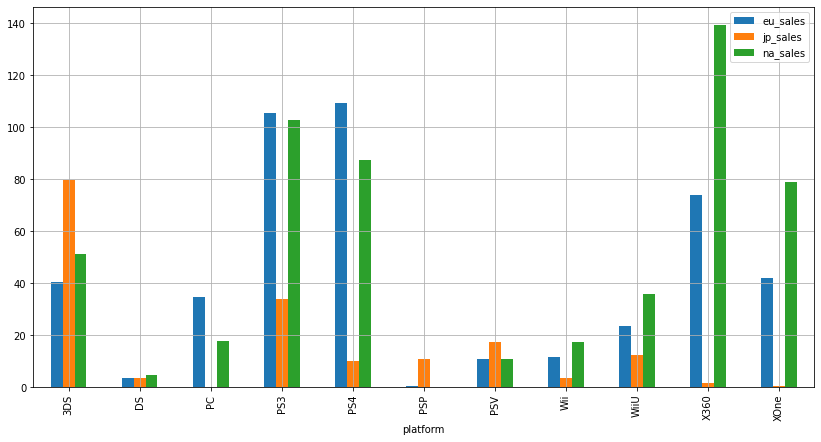

In [ ]:
top_5_platforms_per_region.plot(kind='bar', figsize=(14,7), grid=True);

Самые популярные платформы по продажам игр:<br/>
в Америке - X360, PS3, PS4, XOne, 3DS. <br/>
В Европе - PS4, PS3, X360, XOne, 3DS. <br/>
В Японии - PS4, PS3, X360, XOne, 3DS. <br/>

In [ ]:
# Берем 5 наибольших по jp_sales
top_5_platforms_per_region.nlargest(5, 'jp_sales')
# или можно отсортировать по колонке и взять 5 верхних

,eu_sales,jp_sales,na_sales
platform,,,
3DS,40.31,79.76,51.17
PS3,105.60,33.99,102.71
PSV,10.97,17.48,10.83
WiiU,23.65,12.34,36.00
PSP,0.42,10.71,0.13


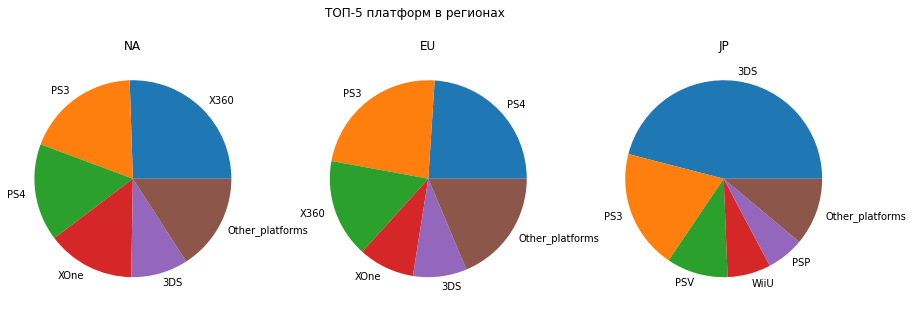

In [ ]:
# задаем список регионов
countries = df_relevant.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df_relevant.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: df_relevant[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

## Топ 5 жанров по регионам.

In [ ]:
top_5_genre_per_region = (df_relevant
        .pivot_table(index='genre', values= ['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
        )   
top_5_genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
Action,149.14,45.73,168.63
Adventure,8.14,7.06,7.97
Fighting,9.45,8.69,17.95
Misc,25.66,12.06,37.43
Platform,20.02,8.52,24.09
Puzzle,1.39,2.14,1.13
Racing,25.52,2.49,16.49
Role-Playing,44.25,58.83,58.11
Shooter,97.57,8.17,128.55


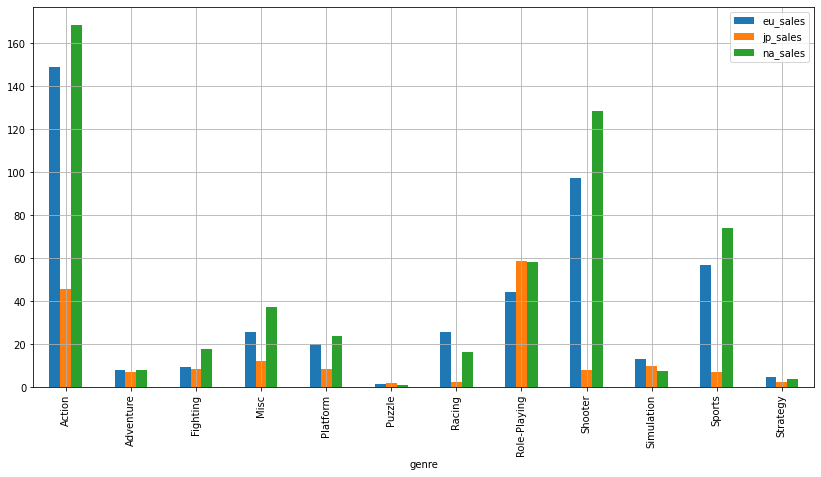

In [ ]:
top_5_genre_per_region.plot(kind='bar', figsize=(14,7), grid=True);

Самые популярные жанры по продажам игр:<br/>
в Америке - Action, Shooter, Sports, Role-Playing, Misc.<br/>
В Европе - Action, Shooter, Sports, Role-Playing, Misc/Racing.<br/>
В Японии - Role-Playing, Action, Misc, Simulation, Fighting.<br/>

## Влияние рейтинга ESRB на продажи в регионах.

Аналогично посмотрим как влияет рейтинг на продажи в каждом регионе.

In [ ]:
rating_per_region = (df_relevant.pivot_table(index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'))
rating_per_region

,eu_sales,jp_sales,na_sales
rating,,,
E,99.42,27.26,106.40
E10+,51.56,7.74,71.89
M,177.90,20.00,216.00
T,43.17,23.75,57.07
unknown,84.03,94.76,94.78


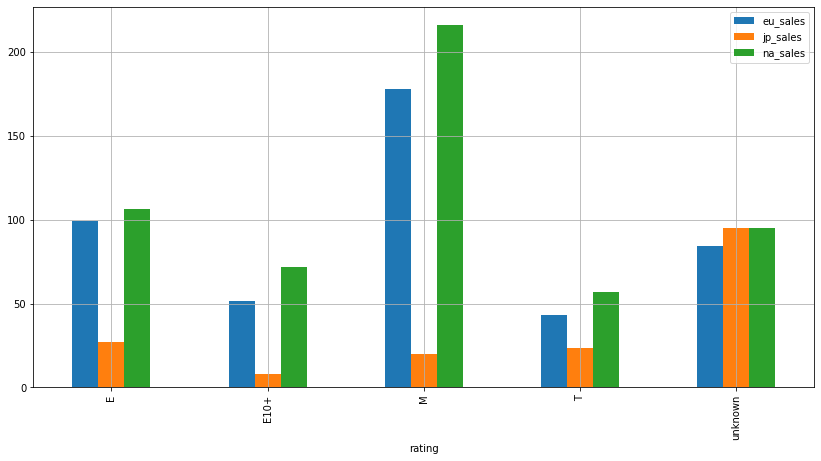

In [ ]:
rating_per_region.plot(kind='bar', figsize=(14,7), grid=True);

Самые популярные жанры по продажам игр: <br/>
<b>В Америке и Европе</b> - M(«Для взрослых»), E(«Для всех»), Неизвестный рейтинг, E10+(«Для всех от 10 лет и старше»), T(«Подросткам»).<br/>
<b>В Японии</b> - Неизвестный рейтинг, E(«Для всех»), T(«Подросткам»), M(«Для взрослых»), E10+(«Для всех от 10 лет и старше»).

# Проверка гипотез.

## Проверка средних пользовательских рейтингов платформ Xbox One и PC

В качестве нулевой гипотезы возьмем: <b>Средние пользовательские рейтинги платформ Xbox One и PC равны</b>.<br/>
В качестве альтернативной гипотезы возьмем: <b>Средние пользовательские рейтинги платформ Xbox One и PC не равны</b>.<br/>

Для этого воспользуемся методом проверки гипотезы о равенстве двух генеральных совокупностей по взятым из них выборкам. Если пороговое значение окажется меньше 0.05, будем считать что гипотеза подтвердилась.

In [ ]:
alpha = .05
results = st.ttest_ind(
    df_relevant.query('platform == "XOne" and not user_score.isna()')['user_score'], 
    df_relevant.query('platform == "PC" and not user_score.isna()')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.981369790613591
Не получилось отвергнуть нулевую гипотезу


p-значение высокое, отвергнуть нулевую гипотезу не получилось. Средние пользовательские рейтинги платформ Xbox One и PC равны.

## Проверка средних пользовательских рейтингов жанров Action  и Sports

В качестве нулевой гипотезы возьмем: <b>Средние пользовательские рейтинги жанров Action и Sports равны</b>.<br/>

В качестве альтернативной гипотезы возьмем: <b>Средние пользовательские рейтинги жанров Action и Sports не равны.


In [ ]:
alpha = .05
results = st.ttest_ind(
    df_relevant.query('genre == "Action" and not user_score.isna()')['user_score'], 
    df_relevant.query('genre == "Sports" and not user_score.isna()')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1594043750544375e-23
Отвергаем нулевую гипотезу


p-value очень маленькое, поэтому отвергаем нашу нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports не равны.


# Общие выводы:

## Описание данных и работы с ними:

Для анализа мы получили датасет, содержащий исторические данные о продажах компьютерных игр, оценке пользователей и критиков, жанрах и платформах.<br>
Таблица содержит 16715 строк, и 11 столбцов.<br>
Исходный датасет содержал большое количество пропусков и проблем с типами данных.
В процессе предобработки данных мы привели все названия столбцов к нижнему регистру, заполнили пропуски там, где это было возможно, расчитали итоговую сумму продаж для каждой игры.

## Результаты анализа:

Как говорилось выше, для анализа мы получили датасет с большим количеством пропусков в очень важных для нас столбцах. Поэтому все выводы стоит использовать учитывая риски, которые могли возникнуть из-за нехватки данных. 
Перед нами стояла задача выявить определяющие успешность игры закономерности. <br>

1. Среди факторов, влияющих на успешность игры является популярность игровой платформы. К ним относятся X360, PS3, PS4, XOne, 3DS. Только платформы PS4 и XOne показывают рост продаж в период 2012-2015, у остальных платформ спад. Но они еще могут принести прибыль. Популярность платформ в разных регионах немного отличается.
2. Наиболее популярные и перспективные игровыми жанрами являются Action, Shooter, Sports и Role-Playing, Misc. В Японии также довольно популярны Simulation, Fighting. Эти же жанры лидируют и в объеме продаж.   <br>
Однако, при средних значениях продаж по жанрам лидеры меняются местами. С большим отрывом лидируют Shooter, далее идут Platform, третье место у Sports.
3. Игры с рейтингом  M, E и Т по ESRB являются самыми популярными. Но к этим данным стоит относиться аккуратно, потому что в исходных данных у 40% игр не был проставлен рейтинг.
4. Оценки критиков сильнее влияют на продажи игры, чем оценки пользователей. Оценка критиков свыше 55 баллов положительно влияет на продажи. Однако корреляция (прямая зависимость) между оценками и уровнем продаж не сильная. К этой информации тоже стоит относиться осторожно, потому что в исходном датасете около 50% игр без оценок. 

В целом предпочтения пользователей во всех регионах примерно одинаковые, в Японии существуют небольшие отличия, на которые нужно обратить внимание при разработке рекламных кампаний.
